In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# https://hockygroup.hosting.nyu.edu/exercise/langevin-dynamics.html

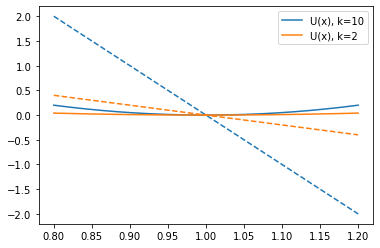

In [3]:
#this function returns the energy and force on a particle from a harmonic potential
def harmonic_oscillator_energy_force(x,k=10,x0=1):
    #calculate the energy on force on the right hand side of the equal signs
    energy = 0.5*k*(x-x0)**2
    force = -k*(x-x0)   
    return energy, force

#this function will plot the energy and force
#it is very general since it uses a special python trick of taking arbitrary named arguments (**kwargs) 
#and passes them on to a specified input function
def plot_energy_force(function, xmin=0.8,xmax=1.2,spacing=0.001,**kwargs):
    x_points = np.arange(xmin,xmax+spacing,spacing)
    energies, forces = function(x_points,**kwargs)
    label = 'U(x)'
    for arg in kwargs:
        label=label+', %s=%s'%(arg,str(kwargs[arg]))
    p = plt.plot(x_points,energies,label=label)
    plt.plot(x_points,forces,label='',color=p[0].get_color(),linestyle='--')
    plt.legend(loc=0)
    
#we can plot the energy (solid) and forces (dashed) to see if it looks right
plot_energy_force(harmonic_oscillator_energy_force,k=10)
plot_energy_force(harmonic_oscillator_energy_force,k=2)


In [4]:
#this is step A
def position_update(x,v,dt):
    x_new = x + v*dt/2.
    return x_new

#this is step B
def velocity_update(v,F,dt):
    v_new = v + F*dt/2.
    return v_new

def random_velocity_update(v,gamma,kBT,dt):
    R = np.random.normal(0,1.0,np.shape(v))
    c1 = np.exp(-gamma*dt)
    c2 = np.sqrt(1-c1*c1)*np.sqrt(kBT)
    v_new = c1*v + R*c2
    return v_new


def baoab(potential, max_time, dt, gamma, kBT, initial_position, initial_velocity,
                                        save_frequency=1, **kwargs ):
    x = initial_position
    v = initial_velocity
    t = 0
    step_number = 0
    positions = []
    velocities = []
    total_energies = []
    save_times = []
    
    while(t<max_time):
        
        # B
        potential_energy, force = potential(x,**kwargs)
        v = velocity_update(v,force,dt)
        
        #A
        x = position_update(x,v,dt)

        #O
        v = random_velocity_update(v,gamma,kBT,dt)
        
        #A
        x = position_update(x,v,dt)
        
        # B
        potential_energy, force = potential(x,**kwargs)
        v = velocity_update(v,force,dt)
        
        if step_number%save_frequency == 0 and step_number>0:
            e_total = .5*v*v + potential_energy

            positions.append(x)
            velocities.append(v)
            total_energies.append(e_total)
            save_times.append(t)
        
        t = t+dt
        step_number = step_number + 1
    
    return np.array(save_times), np.array(positions), np.array(velocities), np.array(total_energies)   

In [5]:
my_k = 5
my_max_time = 1000
# simlen
# initial_radii = .8
Ncells = 256
Mean = np.ones((Ncells,1))

initial_radii = np.random.normal(Mean,0.1,(Ncells,1))
initial_rdot = .2*Mean

my_gamma=10.
my_kBT=0.25
my_dt=0.1

times, positions, velocities, total_energies = baoab(harmonic_oscillator_energy_force, \
                                                                            my_max_time, my_dt, my_gamma, my_kBT, \
                                                                            initial_radii, initial_rdot,\
                                                                            k=my_k)

print(positions.shape)
# print(type(positions))
# positions = np.reshape(positions,(3333,256))
# total_energies = np.reshape(total_energies,(3333,256))
# plt.plot(times,velocities,marker='',label='velocity',linestyle='-')


(9999, 256, 1)


(9999, 256, 1)


Text(0.5, 1.0, 'mean = 1.024598')

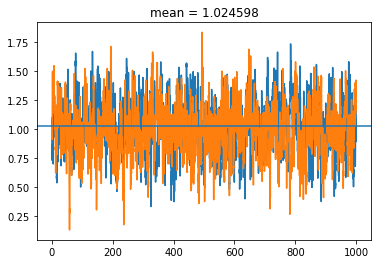

In [7]:
print(np.shape(positions))
positions = np.reshape(positions,(9999,256))
plt.plot(times,positions[:,1],marker='',label='velocity',linestyle='-')
plt.plot(times,positions[:,2],marker='',label='velocity',linestyle='-')

mean1 =np.mean(positions[:,1])
plt.axhline(y = mean1)
plt.title("mean = %f" % mean1)
# print(total_energies.shape())
# arr_energies = np.array(total_energies)
# np.shape(arr_energies)[1]
# arr_energies.shape

In [8]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

In [9]:
A = autocorr(positions[:,1])
A.shape

(9999,)

In [10]:
result = np.correlate(positions[:,1], positions[:,1], mode='full')
result.shape

(19997,)

In [11]:
np.correlate(positions, positions, "same")

ValueError: object too deep for desired array

In [12]:
def acorr(x, lags):
    x_demeaned=x-x.mean()
    corr=np.correlate(x_demeaned,x_demeaned,'full')[len(x)-1:]/(np.var(x)*len(x))

    return corr[:len(lags)]

In [14]:
B = acorr(positions[:,1], np.arange(31))
print(B.shape)
B

(31,)


array([1.        , 0.98117515, 0.93713391, 0.88515843, 0.83253661,
       0.78232871, 0.73527908, 0.69121332, 0.64987473, 0.61096765,
       0.57422094, 0.53971818, 0.50774626, 0.47834587, 0.4512135 ,
       0.42575473, 0.40127684, 0.37741981, 0.35425932, 0.33191759,
       0.31026241, 0.2891986 , 0.26902074, 0.2501002 , 0.23232943,
       0.21544513, 0.19975078, 0.18556434, 0.17259471, 0.16047362,
       0.14924967])

In [19]:
import csv
with open('py_pos_report.csv', 'w') as f:
    csv.writer(f, delimiter=' ').writerows(positions)

In [85]:
# times.shape()
np.shape(times)

(3333,)

<class 'numpy.ndarray'>


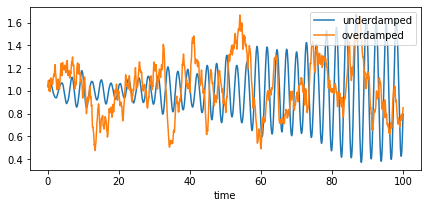

In [122]:
# plt.plot(times,velocities[:,1],marker='',label='velocity',linestyle='-')
myover_gamma = 10
times, overpositions, velocities, total_energies = baoab(harmonic_oscillator_energy_force, \
                                                                            my_max_time, my_dt, myover_gamma, my_kBT, \
                                                                            initial_radii, initial_rdot,\
                                                                            k=my_k)

# print(positions)
print(type(positions))
positions = np.reshape(positions,(3333,256))
total_energies = np.reshape(total_energies,(3333,256))
# plt.plot(times,velocities,marker='',label='velocity',linestyle='-')
plt.figure(figsize=(7,3))

plt.plot(times,positions[:,1],marker='',label='underdamped',linestyle='-')

plt.plot(times,overpositions[:,1],marker='',label='overdamped',linestyle='-')


# plt.plot(times,positions[:,35],marker='',label='radius',linestyle='--')


# plt.plot(times, np.mean(positions,1),label='average radius',linestyle='-')
# plt.xlim(0,00)
plt.xlabel('time')
plt.legend(loc='upper right')

# plt.figure()
# plt.plot(times,total_energies[:,1],marker='o',linestyle='',label='Simulated E')
# plt.xlabel('time')
# plt.ylabel("Total Energy")

# plt.show()

# fig, (ax1, ax2) = plt.subplots( 2,figsize=(5,7))
# # from matplotlib.pyplot import figure


# fig.suptitle('Temporal variation of the radius')
# ax1.plot(times,positions[:,1],marker='',label='underdamped',linestyle='-')
# ax1.legend(loc="upper right")
# ax2.plot(times,overpositions[:,1],marker='',label='overdamped',linestyle='-')
# ax2.legend(loc="upper right")
# plt.legend()


In [26]:
arr_positions = np.array(positions)
arr_positions.shape


(3333, 256, 1)

Text(0, 0.5, 'P(E)')

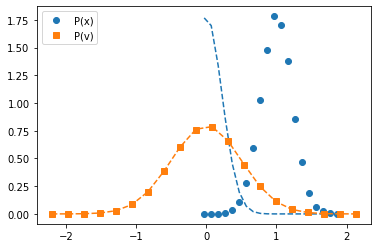

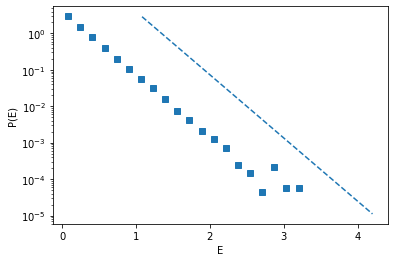

In [42]:
def bin_centers(bin_edges):
    return (bin_edges[1:]+bin_edges[:-1])/2.

def gaussian_x(x,k,kBT):
    denominator = np.sqrt(2*np.pi*kBT/k)
    numerator = np.exp(-k*(x**2)/(2*kBT))
    return numerator/denominator

def gaussian_v(v,kBT):
    denominator = np.sqrt(2*np.pi*kBT)
    numerator = np.exp(-(v**2)/(2*kBT))
    return numerator/denominator

#to get a good histogram, we need to run a lot longer than before
my_max_time = 25000

times, positions, velocities, total_energies = baoab(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, my_gamma, my_kBT, \
                                                                            initial_radii, initial_rdot,\
                                                                             k=my_k)

#let's only use data from the second half of the trajectory, so it can equilibrate
dist_hist, dist_bin_edges = np.histogram(positions[-len(positions)//2:],bins=20,density=True)
vel_hist, vel_bin_edges = np.histogram(velocities[-len(velocities)//2:],bins=20,density=True)
e_hist, e_bin_edges = np.histogram(total_energies[-len(total_energies)//2:],bins=20,density=True)


ideal_prediction_x = gaussian_x(x=bin_centers(dist_bin_edges),k=my_k,kBT=my_kBT )
p = plt.plot(bin_centers(dist_bin_edges), dist_hist,marker='o',label='P(x)',linestyle='')
plt.plot(bin_centers(dist_bin_edges), ideal_prediction_x,linestyle='--',label='', color=p[0].get_color())

ideal_prediction_v = gaussian_v(v=bin_centers(vel_bin_edges),kBT=my_kBT )
p = plt.plot(bin_centers(vel_bin_edges), vel_hist,marker='s',label='P(v)',linestyle='')
plt.plot(bin_centers(vel_bin_edges), ideal_prediction_v,linestyle='--',label='', color=p[0].get_color())

plt.legend(loc='upper left')

plt.figure()
p = plt.plot(bin_centers(e_bin_edges), e_hist,marker='s',label='P(E)',linestyle='')

#compute the energy histogram values to the boltzman factors for the observed energies
plt.plot(bin_centers(e_bin_edges)+1, np.exp(-bin_centers(e_bin_edges)/my_kBT)/my_kBT,linestyle='--',color=p[0].get_color())
plt.yscale('log')
plt.xlabel("E")
plt.ylabel("P(E)")

Text(0, 0.5, 'P(E)')

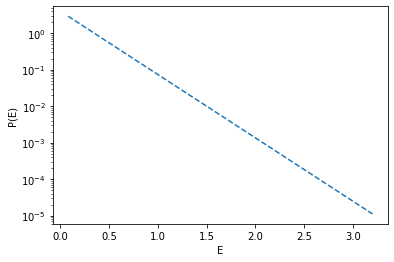

In [43]:
#compute the energy histogram values to the boltzman factors for the observed energies
plt.plot(bin_centers(e_bin_edges), np.exp(-bin_centers(e_bin_edges)/my_kBT)/my_kBT,linestyle='--',color=p[0].get_color())
plt.yscale('log')
plt.xlabel("E")
plt.ylabel("P(E)")

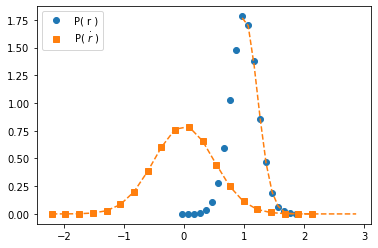

In [100]:
p1 = plt.plot(bin_centers(dist_bin_edges), dist_hist,marker='o',label='P( r )',linestyle='')
plt.plot(bin_centers(dist_bin_edges)+1, ideal_prediction_x,linestyle='--',label='', color=p[0].get_color())

p2 = plt.plot(bin_centers(vel_bin_edges), vel_hist,marker='s',label='P( $\dot{r}$ )',linestyle='')
plt.plot(bin_centers(vel_bin_edges), ideal_prediction_v,linestyle='--',label='', color=p[0].get_color())

plt.legend(loc='upper left')

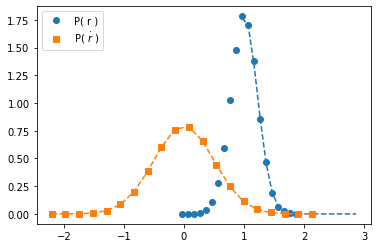

In [57]:
ideal_prediction_x = gaussian_x(x=bin_centers(dist_bin_edges),k=my_k,kBT=my_kBT )
ideal_prediction_v = gaussian_v(v=bin_centers(vel_bin_edges),kBT=my_kBT )

fig, (ax1, ax2) = plt.subplots( 2,figsize=(5,7))
# from matplotlib.pyplot import figure


fig.suptitle('Temporal variation of the radius')
ax1.plot(bin_centers(dist_bin_edges), dist_hist,marker='o',label='P( r )',linestyle='')
ax1.plot(bin_centers(dist_bin_edges)+1, ideal_prediction_x,linestyle='--',label='', color=p1[0].get_color())
ax1.plot(bin_centers(vel_bin_edges), vel_hist,marker='s',label='P( $\dot{r}$ )',linestyle='')
ax1.plot(bin_centers(dist_bin_edges)+1, ideal_prediction_x,linestyle='--',label='', color=p2[0].get_color())

ax1.legend(loc="upper right")

ax2.legend(loc="upper right")



plot_energy_force(harmonic_oscillator_energy_force,k=10)
plot_energy_force(harmonic_oscillator_energy_force,k=2)

In [15]:
with open('/Users/hanshichen/Desktop/engineering/SoftActiveCells/positions_julia_1.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)


In [16]:
data_array = np.array(data, dtype=float)


In [17]:
np.shape(data_array)

(1000, 256)

In [18]:
ju_pos = data_array